In [ ]:
# scikit-learnを用いたパーセプトロンの実装

In [43]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


In [3]:
# 特徴量のスケーリング
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# 訓練データの平均値と分散を計算する
sc.fit(X_train)
# 標準化（このときに用いる平均値、分散は訓練データから見積もったもの）
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
### トレーニング
エポック数40、学習率0.1でパーセプトロンのインスタンスを作成する。`fit`メソッドでモデルを訓練する。
機械学習において「モデルを訓練する」とは、最適な重みを計算することである。

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [ ]:
### テスト
ここまででパーセプトロンは訓練できたので、実際にそれを用いてどれくらい正解するかをみる。1つのテストデータを入れて出力値を正解ラベルと比較する。`y_pred`が訓練したパーセプトロンによる予測値、`y_test`がテストデータ用の正解ラベルである。ここでは誤分類が1事象発生していることが分かる。

In [5]:
y_pred = ppn.predict(X_test_std)
(y_test != y_pred).sum()

1

In [6]:
print("誤分類率：", 1/len(y_pred))
print("正解率：", 1-1/len(y_pred))

誤分類率： 0.022222222222222223
正解率： 0.9777777777777777


In [ ]:
手計算で正解率を計算しなくても、sklearnはすでに便利なメソッドを用意しているのでそれを用いれば良い。

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    
    # 各座標点（格子点座標）を計算する
    # 実際に連続的に座標を計算するのは不可能なので、resolutionパラメータで0.02刻みで座標を
    # 計算させるようにしている
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )
    
    # np.array([xx1.ravel(), xx2.ravel()])で、xx1が1行目とxx2が2行目に並ぶ行列を作ることができる
    # それを転置させることで、1行目から(x, y)の格子点座標が並ぶ行列を作ることができている
    # つまり、作成した格子点座標各点に対して、訓練したモデルの予測クラスラベルを計算させる
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # 計算させたZが同じ値のものを同じ色で塗り分ける様な等高線プロットを作成する
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
        
    
    if test_idx : 
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:,1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


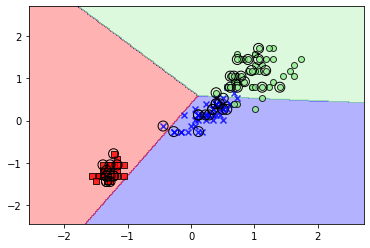

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.show()

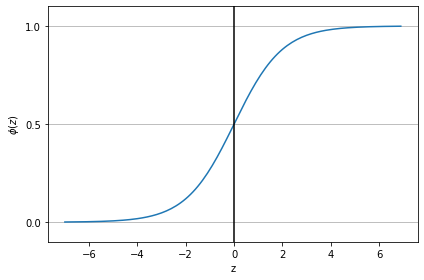

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 /  (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)

plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])

ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

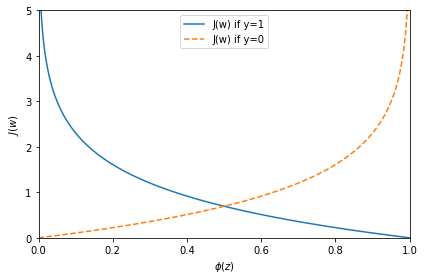

In [11]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return  - np.log(1- sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5)
plt.xlim(0,1)

plt.xlabel('$\phi (z)$')
plt.ylabel('$J(w)$')

plt.legend(loc='upper center')

plt.tight_layout()
plt.show()

In [ ]:
y=1（青線）のとき：

コスト関数は青線の振る舞いをし、$\phi(z)$が１に近づくにつれ（$\phi(z)$がクラスラベル1に属する確率を表現していることを思い出すと）、コスト関数は0に収束する。これは予測が正しくコスト関数は最小になるということを表している。逆に、０に近づくと発散するため、コストが上がっており相応のペナルティが課されていると考えることができる。

In [12]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = -y.dot(np.log(output)) - ( (1 - y).dot(np.log(1- output)))
            self.cost_.append(cost)
        
        return self

    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    
    def predict(self, X):
        return np.where(self.net_input(X) > 0.0, 1, 0 )

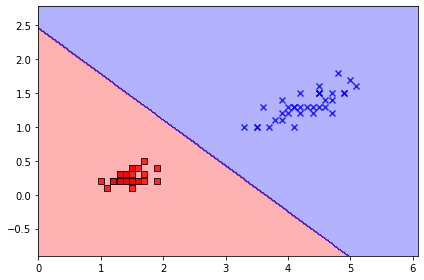

In [13]:
X_train_01_subset = X_train[(y_train==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train==0)|(y_train==1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.tight_layout()
plt.show()

In [ ]:
### scikit-learnを用いて
以上の実装は、scikit-learnで与えられているため、その使い方を見てみる。
ADALINEと違ってロジスティック回帰モデルは二値分類だけでなく、多値分類モデルとして簡単に一般化することができる。
２値分類ではシグモイド関数を使っているが（０〜１の出力でクラスに属する確率を表現していた）、多値分類ではソフトマックス関数と呼ばれる活性化関数を使用してクラスに分類される確率を表現していることに留意（これは本書では扱わない話）。

/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


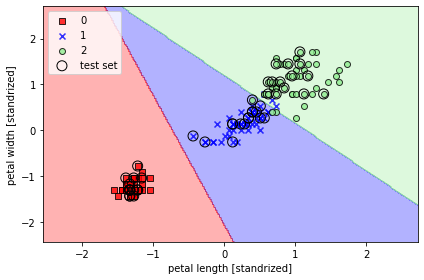

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

plt.xlabel('petal length [standrized]')
plt.ylabel('petal width [standrized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [15]:
X_test_std.shape

(45, 2)

In [16]:
# 最初の3事象について、それぞれどのクラスに分類されるかを確率で返す
lr.predict_proba(X_test_std[:3, :]) 

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [17]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [18]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [19]:
# scikit-learnはデータ入力として2次元配列を期待しているので、次のコーディングはエラーを引き起こす
# lr.predict(X_test_std[0])
# そのため、単一のデータ店に対してクラスラベルを予測したい場合には、
lr.predict(X_test_std[0, :].reshape(1,-1))

array([2])

In [ ]:
ちなみに、numpyの使い方で、以下の様な形式をここでは用いている。
普通に`X_test_std[0, :]`としただけでは2次元配列ではないので：

In [20]:
print(X_test_std[0, :])
print("shape = ", X_test_std[0, :].shape)

[0.89820289 1.44587881]
shape =  (2,)


In [ ]:
`reshape`で無理やり1行2列の2次元配列として変換している。

In [21]:
print(X_test_std[0, :].reshape(1,-1))
print("shape = ", X_test_std[0, :].reshape(1,-1).shape)
print("shape = ", X_test_std[0, :].reshape(-1,1).shape) # ちなみにこうすると、2行1列の2次元配列になる

[[0.89820289 1.44587881]]
shape =  (1, 2)
shape =  (2, 1)


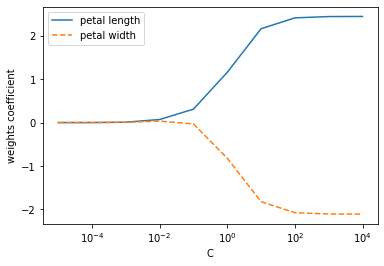

In [22]:
weights, params = [], []
for c in np.arange(-5, 5):
    # ロジスティック回帰モデルのインスタンス作成
    lr = LogisticRegression(C=10. ** c, random_state=1, solver='lbfgs', multi_class='ovr')
    # モデルをフィットさせる
    lr.fit(X_train_std, y_train)
    # 
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)

plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1],   linestyle='--', label='petal width')
plt.ylabel('weights coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')

plt.show()

/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


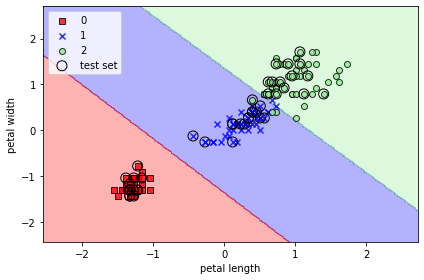

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
## カーネルSVM

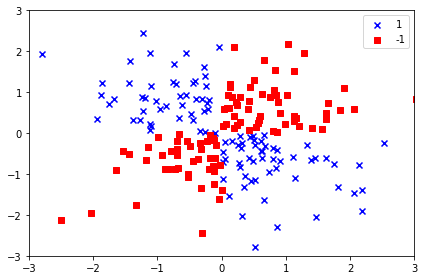

In [24]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
# 200行2列の乱数の行列を作る
X_xor = np.random.randn(200, 2)
# XOR で200行1列のラベルを作る
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1] > 0)
# True/Falseを1, -1に置き換える
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3,3])

plt.legend(loc='best')
plt.tight_layout()
plt.show()

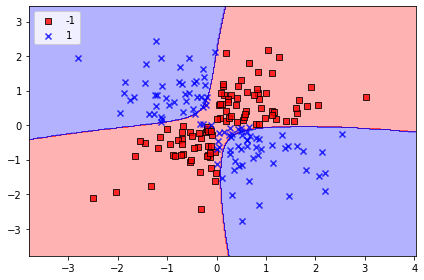

In [25]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0 )
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


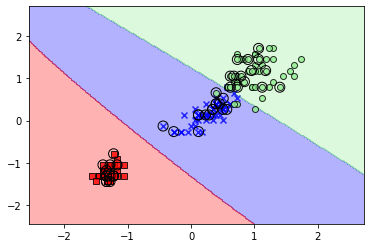

/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


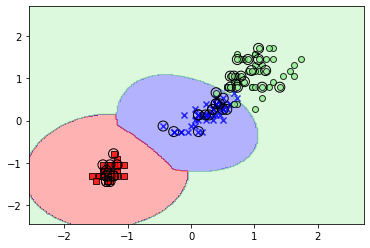

/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


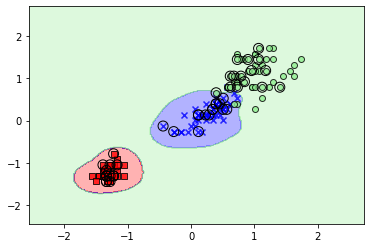

/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


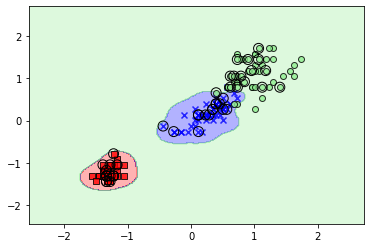

/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


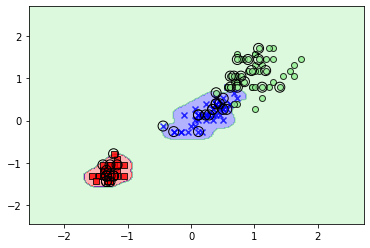

/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


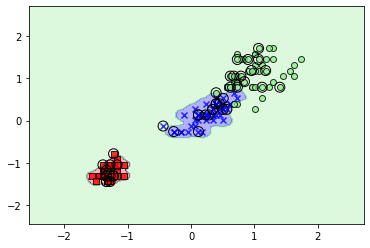

In [26]:
for igamma in (0.1, 1,10, 20, 50, 100):
    svm = SVC(kernel='rbf', random_state=1, gamma=igamma, C=1.0)
    svm.fit(X_train_std, y_train)
    plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
    plt.show()

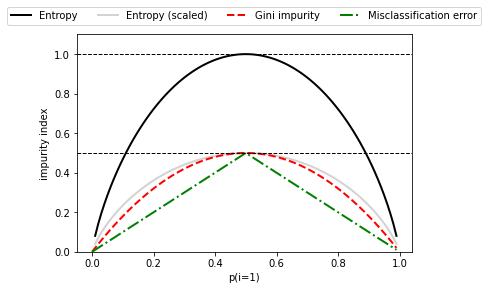

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# 引数pは、あるノードにおけるクラス1が属する割合を示す
# ここでは二分木を考えているので、i=1, 2 のみを考える
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1-p))

def entropy(p):
    return -p * np.log2(p) - (1-p)*np.log2(1-p)

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0, 1, 0.01)

# エントロピーは0で発散してしまうので、0を除くためリスト内包表記で計算させている
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
# np.maxはリストの先頭の要素のみを考えるので、リスト内包表記で全要素に対して計算している
err = [error(p) for p in x]
# ジニはそのままで大丈夫
gini = gini(x)

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip(
    [ent, sc_ent, gini, err], 
    ['Entropy', 'Entropy (scaled)', 'Gini impurity', 'Misclassification error'],
    ['-', '-', '--', '-.'],
    ['black', 'lightgray', 'red', 'green', 'cyan',]):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')

plt.show()    

/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


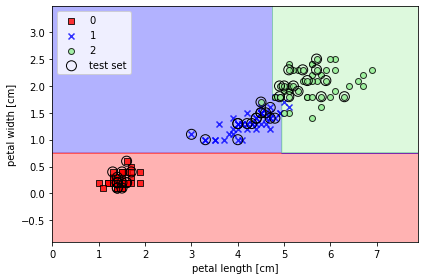

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

# X_ は2列の行列なので、vstack
X_combined = np.vstack((X_train, X_test))
# y_は1列なので、hstack
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

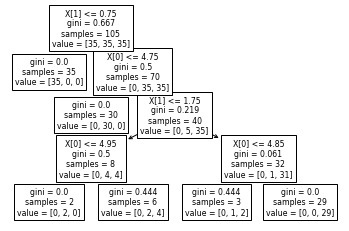

In [46]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

### k最近傍法（怠惰学習アルゴリズム）

/Users/takeda/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


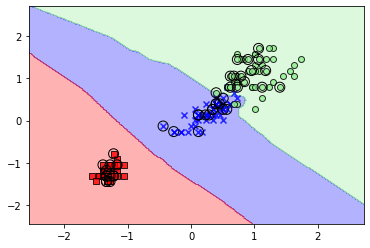

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))

plt.show()